Best Cut: ({0, 1, 3, 4}, {2})
Max Cut Value: 8.0


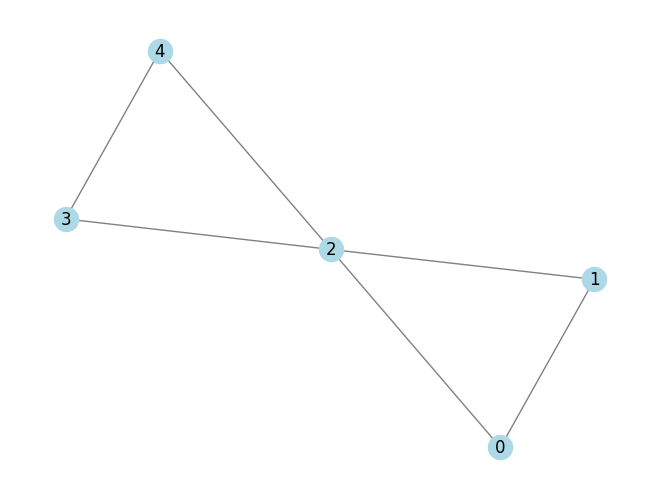

In [18]:
import numpy as np
import utils 
import importlib
importlib.reload(utils)

n=np.arange(0, 5, 1)
w_e=[(0, 1, 1.0), (0, 2, 1.0), (1, 2, 1.0), (3, 2, 1.0), (3, 4, 1.0), (4, 2, 1.0)]
G = utils.create_graph(n, w_e)
best_cut, best_cut_value = utils.classical_max_cut(G)
print("Best Cut:", best_cut)
print("Max Cut Value:", best_cut_value)
utils.visualize_graph(G, best_cut)